In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
import sqlite3

Loading the dataset

In [2]:
#creating the connection

conn = sqlite3.connect('inventory.db')


#fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalSalesPrice,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,145080,3811251.60,142049.0,5.101920e+06,260999.20,672819.31,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,164038,3804041.22,160247.0,4.819073e+06,294438.66,561512.37,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,187407,3418303.68,187140.0,4.538121e+06,343854.07,461140.15,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,201682,3261197.94,200412.0,4.475973e+06,368242.80,420050.01,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,138109,3023206.01,135838.0,4.223108e+06,249587.83,545778.28,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
#summary statistics

df.describe().T

d:\vendor-performance-project\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalExciseTax,10692.0,1.774226e+03,10975.582240,0.00,4.800000,46.570000,418.650000,3.682428e+05
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


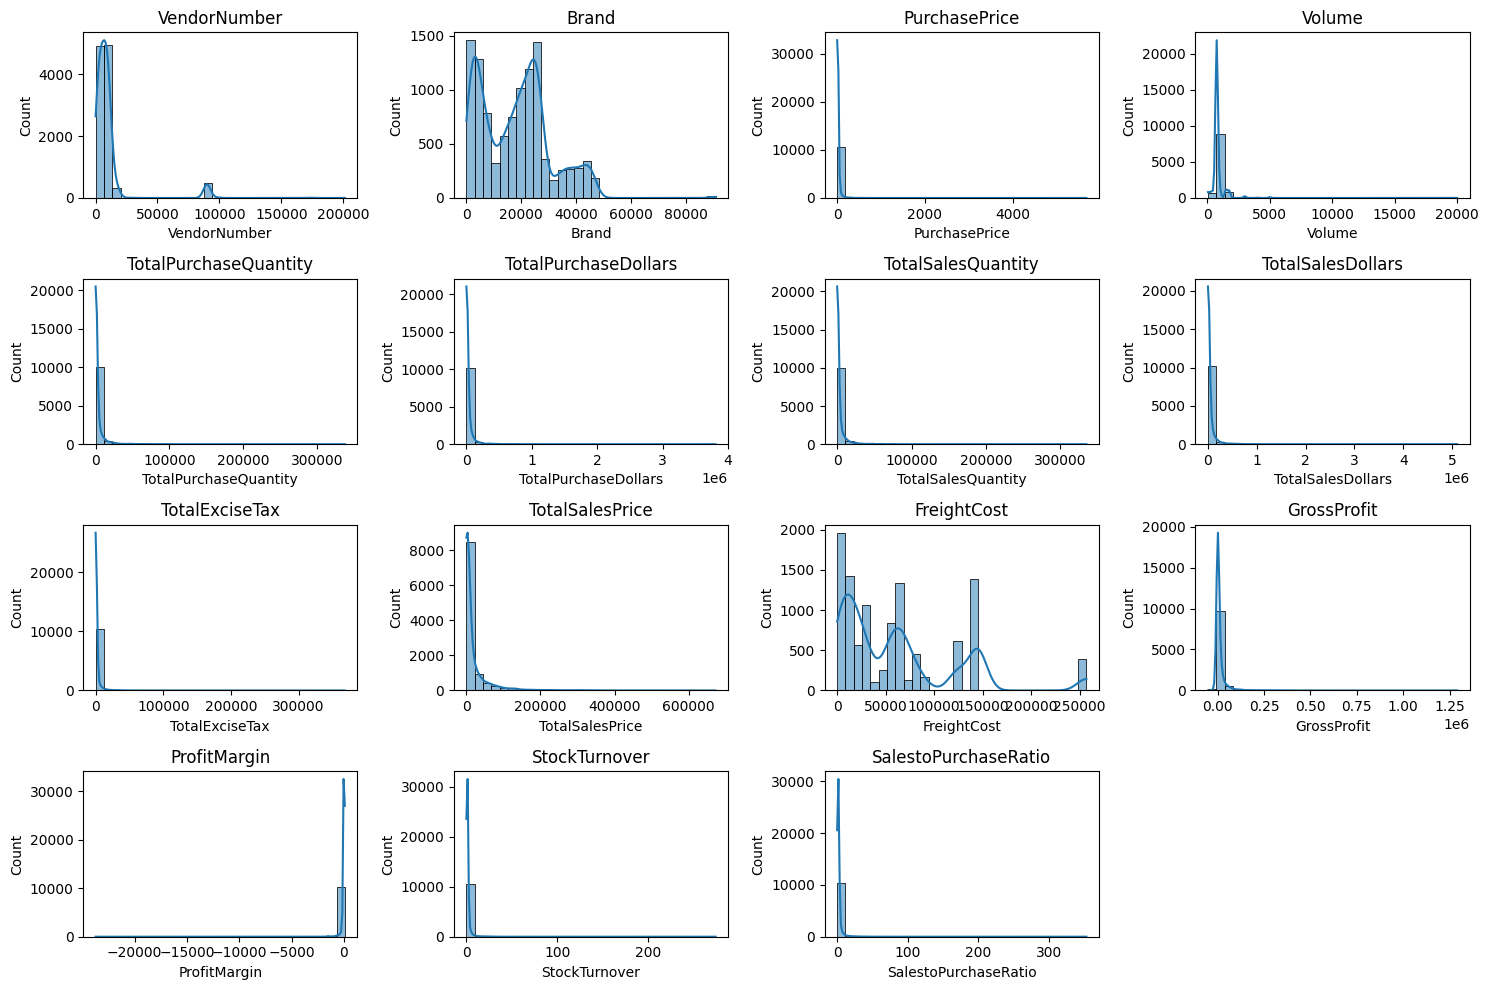

In [4]:
#Distribution Plots for Numerical Columns

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()
    


Summary Statistics Insights:
Negative & Zero Values:

1. Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
2. Profit Margin: Has a minimum of -oo, which suggests cases where revenue is zero or even lower than costs.
3. Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete
stock.

Outliers Indicated by High Standard Deviations:
1. Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
2. Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
3. Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

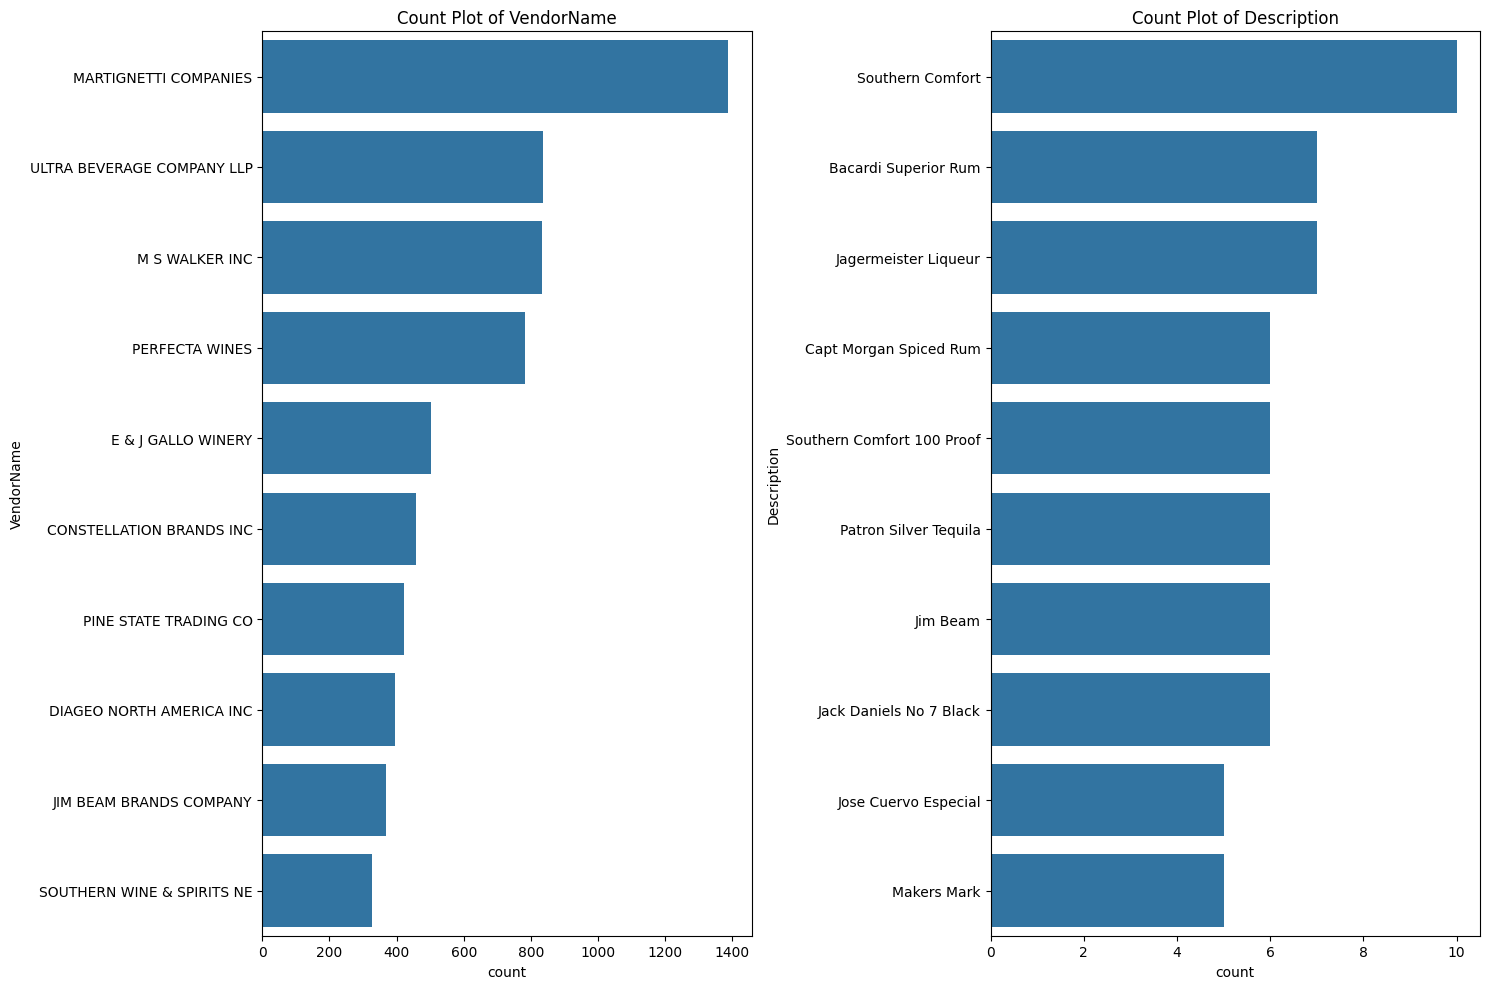

In [5]:
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()
    

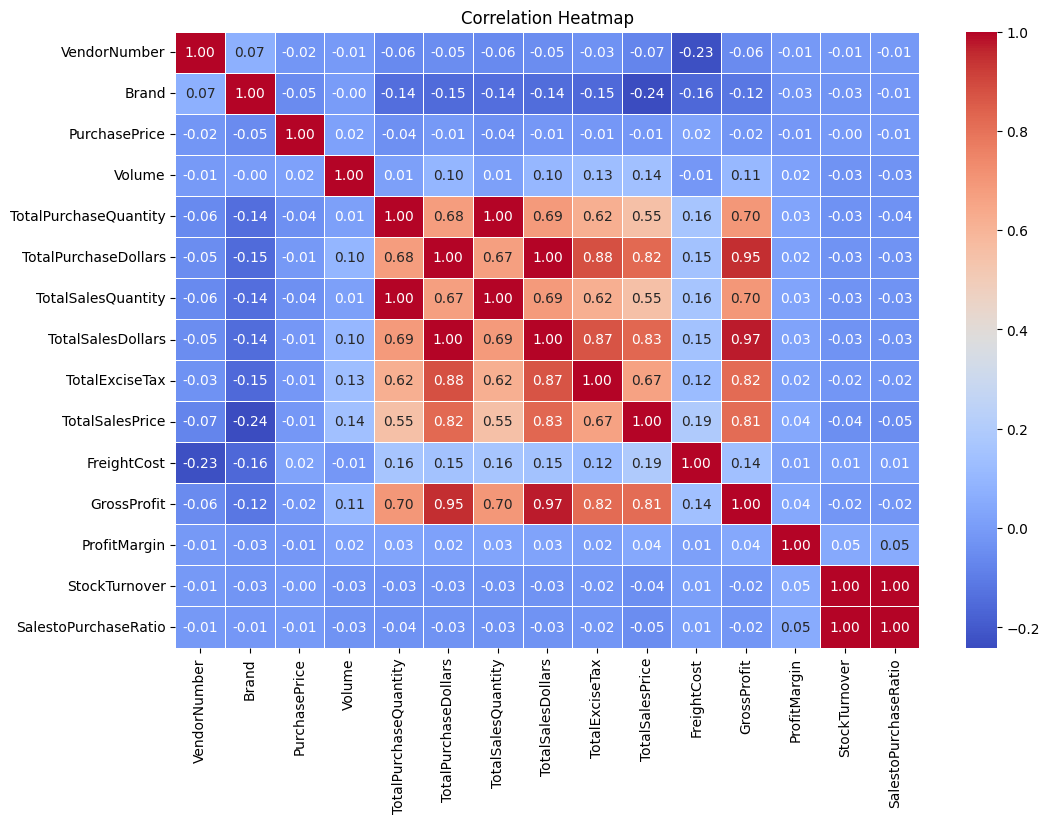

In [6]:
plt.figure(figsize=(12, 8))

correlation_mmatrix = df[numerical_cols].corr()
sns.heatmap(correlation_mmatrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Insights
1. PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
2. Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
3. Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
4. StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

In [7]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [8]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

print(low_sales_threshold)
print(high_margin_threshold)

286.185
56.198056057838855


In [9]:
#Filter brands with low sales threshold but high_margin_threshold

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
7777,Santa Rita Organic Svgn Bl,9.99,66.466466
2896,Debauchery Pnt Nr,11.58,65.975820
2537,Concannon Glen Ellen Wh Zin,15.95,83.448276
2677,Crown Royal Apple,27.86,89.806174
7818,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
8939,Tommasi Poggio Tufo Cab Svgn,269.73,74.789604
9229,Vigne A Porrona Rosso,272.79,96.825397
3980,Gifft Chardonnay,279.80,94.245890
5736,Mad Dogs & Englishmen Jumil,279.80,97.666190


In [10]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [11]:
#Top vendors and brands by sales performance

top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

print(top_vendors)
print(top_brands)


VendorName
DIAGEO NORTH AMERICA INC      6.873983e+07
MARTIGNETTI COMPANIES         4.096012e+07
PERNOD RICARD USA             3.227954e+07
JIM BEAM BRANDS COMPANY       3.189862e+07
BACARDI USA INC               2.500537e+07
CONSTELLATION BRANDS INC      2.446713e+07
E & J GALLO WINERY            1.855377e+07
BROWN-FORMAN CORP             1.847661e+07
ULTRA BEVERAGE COMPANY LLP    1.780265e+07
M S WALKER INC                1.543607e+07
Name: TotalSalesDollars, dtype: float64
Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64


In [12]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [13]:
#Which vendors contribute the most to total purchase dollars?

vendor_performance = df.groupby('VendorName').agg({
    "TotalPurchaseDollars":"sum",
    "GrossProfit":"sum",
    "TotalSalesDollars":"sum"
}).reset_index()

In [14]:
vendor_performance['PurchaseContributer%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()
vendor_performance = round(vendor_performance.sort_values('PurchaseContributer%', ascending=False), 2)

In [15]:
#Top 10 vendors

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

C:\Users\cnuna\AppData\Local\Temp\ipykernel_7824\30300584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
C:\Users\cnuna\AppData\Local\Temp\ipykernel_7824\30300584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
C:\Users\cnuna\AppData\Local\Temp\ipykernel_7824\30300584.py:6: SettingWithCopyWarning: 
A value is trying

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContributer%
28,DIAGEO NORTH AMERICA INC,50.96M,17.78M,68.74M,0.16
63,MARTIGNETTI COMPANIES,27.86M,13.10M,40.96M,0.09
50,JIM BEAM BRANDS COMPANY,24.20M,7.70M,31.90M,0.08
74,PERNOD RICARD USA,24.12M,8.16M,32.28M,0.07
8,BACARDI USA INC,17.62M,7.38M,25.01M,0.05
23,CONSTELLATION BRANDS INC,15.57M,8.89M,24.47M,0.05
14,BROWN-FORMAN CORP,13.53M,4.95M,18.48M,0.04
114,ULTRA BEVERAGE COMPANY LLP,13.21M,4.59M,17.80M,0.04
33,E & J GALLO WINERY,12.29M,6.26M,18.55M,0.04
59,M S WALKER INC,10.94M,4.50M,15.44M,0.03


In [16]:

top_vendors['PurchaseContributer%'].sum()


np.float64(0.6500000000000001)

In [17]:
#total procurement is dependent on top vendors

print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContributer%'].sum(), 2)}%")

Total Purchase Contribution of top 10 vendors is 0.65%


In [18]:
#does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

df["OrderSize"] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=["Small", "Medium", "Large"])

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalSalesPrice,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,145080,3811251.60,142049.0,5.101920e+06,260999.20,672819.31,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,164038,3804041.22,160247.0,4.819073e+06,294438.66,561512.37,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,187407,3418303.68,187140.0,4.538121e+06,343854.07,461140.15,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,201682,3261197.94,200412.0,4.475973e+06,368242.80,420050.01,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,138109,3023206.01,135838.0,4.223108e+06,249587.83,545778.28,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,2,2.64,5.0,1.595000e+01,0.55,10.96,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,6,2.34,134.0,6.566000e+01,7.04,1.47,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,2,1.48,2.0,1.980000e+00,0.10,0.99,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1,1.47,72.0,1.432800e+02,15.12,77.61,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small


In [19]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

C:\Users\cnuna\AppData\Local\Temp\ipykernel_7824\1505448859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
Small,43.776954
Medium,17.894005
Large,11.308807


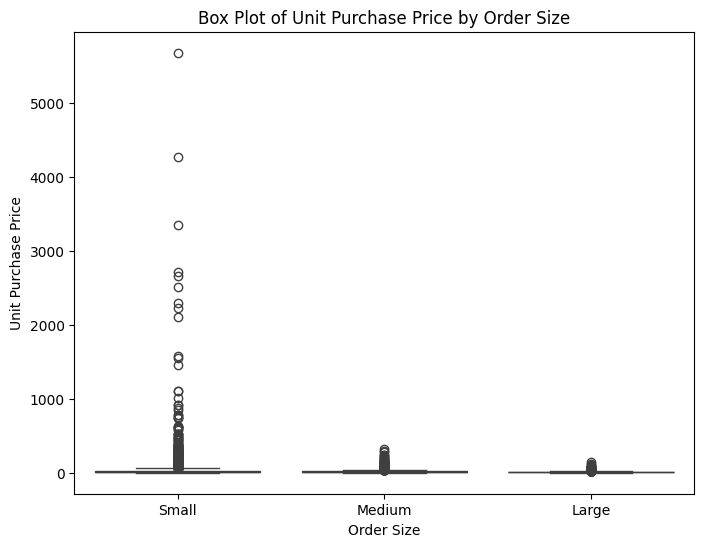

In [20]:
# Assuming df is your DataFrame and it has columns 'OrderSize' and 'UnitPurchasePrice'

plt.figure(figsize=(8,6))
sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=df, order=['Small', 'Medium', 'Large'])
plt.title('Box Plot of Unit Purchase Price by Order Size')
plt.xlabel('Order Size')
plt.ylabel('Unit Purchase Price')
plt.show()


Larger order sizes have significantly lower unit purchase prices, indicating cost savings through bulk buying.
Small orders not only cost more per unit but may also show greater price variability.
Consolidating purchases into larger orders could improve pricing consistency and reduce costs.


In [21]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
AAPER ALCOHOL & CHEMICAL CO,0.000000
LAUREATE IMPORTS CO,0.000000
TRUETT HURST,0.041667
"IRA GOLDMAN AND WILLIAMS, LLP",0.075000
HIGHLAND WINE MERCHANTS LLC,0.148920
UNCORKED,0.217238
MILTONS DISTRIBUTING CO,0.236111
VINEYARD BRANDS LLC,0.256241
LOYAL DOG WINERY,0.308333


In [22]:
#how much capital locked

df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))


Total Unsold Capital: 8.75M


In [23]:
inventory_value_per_vendor = df.groupby("VendorName")['UnsoldInventoryValue'].sum().reset_index()
#sort vendor with highest locked capital

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
28,DIAGEO NORTH AMERICA INC,980.09K
63,MARTIGNETTI COMPANIES,928.99K
50,JIM BEAM BRANDS COMPANY,857.80K
114,ULTRA BEVERAGE COMPANY LLP,780.27K
73,PERFECTA WINES,571.81K
74,PERNOD RICARD USA,554.74K
59,M S WALKER INC,469.96K
125,WILLIAM GRANT & SONS INC,436.49K
33,E & J GALLO WINERY,315.20K
14,BROWN-FORMAN CORP,284.91K


In [24]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

print(top_vendors)
print(low_vendors)


0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
5530    93.085860
5648    90.021514
5651    89.883453
5773    95.012530
5945    94.271857
Name: ProfitMargin, Length: 2673, dtype: float64
2147    -1.937860e+04
2456             -inf
2462    -1.127268e+04
2528             -inf
2982             -inf
             ...     
10687    8.344828e+01
10688    9.643619e+01
10689    2.525253e+01
10690    9.897404e+01
10691    9.916608e+01
Name: ProfitMargin, Length: 2673, dtype: float64


In [25]:
# def confidence_interval(data, confidence=0.95):
#     mean_val = np.mean(data)
#     std_err = np.std(data, ddof=1) / np.sqrt(len(data))
#     t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
#     margin_of_error = t_critical * std_err
#     return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


def confidence_interval(data, confidence=0.95):
    data = np.array(data)
    data = data[~np.isnan(data)]  # remove NaNs
    data = data[np.isfinite(data)]  # remove inf and -inf

    if len(data) < 2:
        return np.nan, np.nan, np.nan

    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


In [26]:
# Clean low vendors first
cleaned_low_vendors = low_vendors.replace([np.inf, -np.inf], np.nan).dropna()

# Compute confidence interval for top vendors (assuming already valid)
top_mean, top_lower, top_upper = confidence_interval(top_vendors)

# Compute confidence interval for low vendors if enough data
if len(cleaned_low_vendors) > 1:
    low_mean, low_lower, low_upper = confidence_interval(cleaned_low_vendors)
    print(f"Low Vendors - Mean: {low_mean:.2f}, Lower Bound: {low_lower:.2f}, Upper Bound: {low_upper:.2f}")
else:
    print("Not enough data for low vendors to compute confidence interval.")
    low_mean = low_lower = low_upper = float('nan')

print(f"Top Vendors - Mean: {top_mean:.2f}, Lower Bound: {top_lower:.2f}, Upper Bound: {top_upper:.2f}")

Low Vendors - Mean: -141.93, Lower Bound: -177.17, Upper Bound: -106.69
Top Vendors - Mean: 30.04, Lower Bound: 29.53, Upper Bound: 30.55


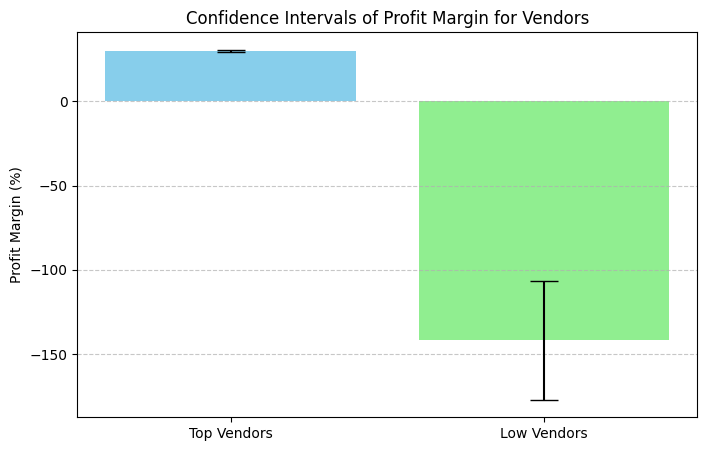

In [27]:
# Prepare data
groups = ['Top Vendors', 'Low Vendors']
means = [top_mean, low_mean]
lower_bounds = [top_mean - top_lower, low_mean - low_lower]
upper_bounds = [top_upper - top_mean, low_upper - low_mean]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(groups, means, yerr=[lower_bounds, upper_bounds], capsize=10, color=['skyblue', 'lightgreen'])
plt.ylabel('Profit Margin (%)')
plt.title('Confidence Intervals of Profit Margin for Vendors')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observation:

The low vendors have a significantly negative mean profit margin of approximately -142%, with a confidence interval ranging from -177% to -107%, indicating substantial losses. In contrast, the top vendors show a positive mean profit margin of about 30%, with a narrow confidence interval between 29.5% and 30.5%, reflecting consistent profitability. This stark difference highlights the disparity in financial performance between high and low sales vendors.